# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
pwd

'/content'

In [4]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [5]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip sentiment-analysis-on-movie-reviews.zip -d mydata

Archive:  sentiment-analysis-on-movie-reviews.zip
replace mydata/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mydata/sampleSubmission.csv  
  inflating: mydata/test.tsv.zip     
  inflating: mydata/train.tsv.zip    


In [7]:
train_fname='/content/mydata/train.tsv.zip'
test_fname='/content/mydata/test.tsv.zip'
sample_subfname="/content/mydata/sampleSubmission.csv"

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [8]:
raw_df=pd.read_csv(train_fname,sep='\t')

In [9]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [10]:
raw_df.Sentiment.value_counts()
'''
The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive
'''

'\nThe sentiment labels are:\n\n0 - negative\n1 - somewhat negative\n2 - neutral\n3 - somewhat positive\n4 - positive\n'

In [11]:
raw_df.Phrase.sample(10).values


array(['a case of too many chefs fussing over too weak a recipe',
       'parable of renewal', "are n't your bailiwick",
       'caring for animals and', 'still can be made', 'most delightful',
       'is smart , not cloying',
       "channeling Kathy Baker 's creepy turn as the repressed mother on Boston Public just as much as 8 Women 's Augustine",
       'insultingly inept and artificial examination', 'enough interest'],
      dtype=object)

In [12]:
raw_df.shape

(156060, 4)

In [13]:
raw_df.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [14]:
test_df=pd.read_csv(test_fname,sep='\t')
test_df


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [15]:
test_df.shape

(66292, 3)

In [16]:
test_df.Phrase.sample(10).values

array(['begets',
       'it to Rohmer , now 82 , to find a way to bend current technique to the service of a vision of the past that is faithful to both architectural glories and commanding open spaces of the city as it was more than two centuries ago',
       'let down',
       'the movie hits so close to home so much as that it hits close to home while engaging in such silliness as that snake-down-the-throat business and the inevitable shot of Schwarzenegger outrunning a fireball',
       'By presenting an impossible romance in an impossible world',
       'English-language copy', 'About nowhere kids',
       "one of Latin America 's most oppressive regimes", 'on stage',
       'you loved about it in 1982'], dtype=object)

In [17]:
sub_df=pd.read_csv(sample_subfname)

In [18]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [19]:
sub_df.Sentiment.value_counts()

2    66292
Name: Sentiment, dtype: int64

In [20]:
plt=raw_df.Sentiment.value_counts(normalize='True')

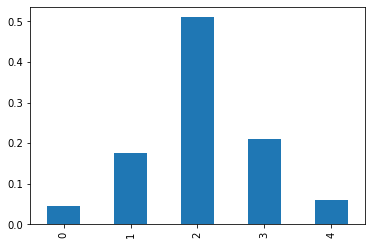

In [21]:
plt.sort_index().plot(kind='bar')

#gaussian distribution indicated

##**Summarize your insights and learnings from the dataset below:**

* raw_df=156060 rows × 4 columns ,'PhraseId', 'SentenceId', 'Phrase', 'Sentiment'

* test_df=66292 rows * 3 columns ,"'PhraseId', 'SentenceId', 'Phrase'"

* sub_df=66292 rows * 2 columns 
'PhraseId','Sentiment'

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [22]:
import nltk


In [23]:
from nltk.tokenize import word_tokenize

In [24]:
m0=raw_df.Phrase.values[0]

In [25]:
m0



'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [26]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
word_tokenize(m0)


['A',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story',
 '.']

In [28]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language='english')

In [29]:
def tokenize(text):
  return [stemmer.stem(word.lower()) for word in word_tokenize(text)]

In [30]:
tokenize(m0)

['a',
 'seri',
 'of',
 'escapad',
 'demonstr',
 'the',
 'adag',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goos',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasion',
 'amus',
 'but',
 'none',
 'of',
 'which',
 'amount',
 'to',
 'much',
 'of',
 'a',
 'stori',
 '.']

In [31]:
tokenize("Is this a way to (learn) nlp?")

['is', 'this', 'a', 'way', 'to', '(', 'learn', ')', 'nlp', '?']

In [32]:
from nltk.corpus import stopwords


In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stops = set(stopwords.words('english'))

In [35]:
",".join(stops)
                

                
                

"myself,you,of,was,be,d,as,each,haven,were,wasn't,our,on,having,should,y,are,theirs,mightn't,both,s,whom,had,nor,mightn,his,ll,isn,while,aren,that,but,doing,won,you're,should've,won't,and,don,mustn,between,down,out,isn't,once,couldn,to,now,hadn,such,then,t,their,doesn't,hasn,wouldn't,my,your,needn,him,he,didn,further,if,there,herself,above,against,over,have,it,wouldn,so,than,that'll,because,again,until,is,she's,same,she,shan't,you'll,himself,has,a,ourselves,them,off,here,who,only,any,yourselves,under,ours,themselves,an,do,shouldn't,why,those,needn't,re,did,own,the,yours,does,i,into,its,at,too,just,aren't,yourself,below,from,ain,more,what,they,through,or,hers,before,ve,we,been,very,all,most,ma,where,weren,weren't,you'd,other,mustn't,no,doesn,being,for,with,few,don't,didn't,in,shan,these,which,o,after,can,about,couldn't,wasn,itself,up,her,some,am,how,haven't,will,m,during,when,by,not,this,hadn't,hasn't,me,you've,shouldn,it's"

In [36]:
#CUSTOM_STOP=[these,being,been,doing,such,could,would,her,theirs,or,she's,them,should,themselves,does,the,between,yourself,ll,you're,if,you'd,for,now,but,hers,out,had,very,during,my,they,was,same,won't,both,its,because,no,you'll,d,ours,should've,by,under,yours,did,as,who,myself,all,above,haven't,having,won,few,when,here,too,ain,was,once,off,then,how,you,s,does,over,most,an,him,through,yourselves,below,be,down,can,in,is,you've,further,some,until,wasn,with,himself,has,own,only,might,there,y,the,just,do,need,me,couldn't,which,so,other,not,against,on,his,doesn't,why,where,should,after,into,would,before,up,and,he,your,she,are,at,whom,more,it's,again,has,a,am,ve,any,from,have,of,are,should,have,were,t,will,that,itself,about,to,each,what,i,must,than,m,we,ma,herself,ourselves,their,while,this,hers,out,had,very,during,my,they,was,same,both,its,because,you'll,d,ours]

Here is list of STOPWORDS


NEED TO CUT OUT THE NEGATIVE WORDS BCOS ALL THESE ARE SHOWING SENTIMENT

In [37]:
SELECTED_STOPS=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'do','should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y','ma']

In [38]:
def remove_stopwords(token):
  return [word for word in token if word.lower() not in SELECTED_STOPS ]

In [39]:
remove_stopwords(m0)

[' ',
 'e',
 'r',
 'e',
 ' ',
 'f',
 ' ',
 'e',
 'c',
 'p',
 'e',
 ' ',
 'e',
 'n',
 'r',
 'n',
 'g',
 ' ',
 'h',
 'e',
 ' ',
 'g',
 'e',
 ' ',
 'h',
 ' ',
 'w',
 'h',
 ' ',
 ' ',
 'g',
 ' ',
 'f',
 'r',
 ' ',
 'h',
 'e',
 ' ',
 'g',
 'e',
 ' ',
 ' ',
 'l',
 ' ',
 'g',
 ' ',
 'f',
 'r',
 ' ',
 'h',
 'e',
 ' ',
 'g',
 'n',
 'e',
 'r',
 ' ',
 ',',
 ' ',
 'e',
 ' ',
 'f',
 ' ',
 'w',
 'h',
 'c',
 'h',
 ' ',
 'c',
 'c',
 'n',
 'l',
 'l',
 ' ',
 'u',
 'e',
 ' ',
 'b',
 'u',
 ' ',
 'n',
 'n',
 'e',
 ' ',
 'f',
 ' ',
 'w',
 'h',
 'c',
 'h',
 ' ',
 'u',
 'n',
 ' ',
 ' ',
 'u',
 'c',
 'h',
 ' ',
 'f',
 ' ',
 ' ',
 'r',
 ' ',
 '.']

In [40]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [41]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,stop_words=SELECTED_STOPS,ngram_range=(1,2),max_features=5000)

In [42]:
vectorizer.fit(raw_df.Phrase)  #to learn the vocabulary

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7eff5ecff670>)

In [43]:
len(vectorizer.vocabulary_)

5000

In [44]:
vectorizer.get_feature_names_out()[:500]



array(['!', '! ``', '$', '&', "'", "' -rrb-", "' .", "' `", "''", "'d",
       "'d expect", "'m", "'m sure", "'s", "'s '", "'s ,", "'s -",
       "'s -rrb-", "'s `", "'s ``", "'s also", "'s bad", "'s best",
       "'s better", "'s big", "'s book", "'s brilliant", "'s career",
       "'s charact", "'s classic", "'s clear", "'s cut", "'s dark",
       "'s definit", "'s difficult", "'s direct", "'s documentari",
       "'s done", "'s easi", "'s end", "'s enough", "'s entertain",
       "'s face", "'s far", "'s film", "'s final", "'s fun", "'s funni",
       "'s go", "'s good", "'s got", "'s great", "'s happen", "'s hard",
       "'s heart", "'s imposs", "'s interest", "'s latest", "'s life",
       "'s like", "'s littl", "'s lot", "'s love", "'s make", "'s moral",
       "'s movi", "'s much", "'s neither", "'s never", "'s new",
       "'s noth", "'s novel", "'s one", "'s onli", "'s perform",
       "'s plot", "'s point", "'s pretti", "'s previous", "'s quit",
       "'s rare", "'s real", 

Notice bigrams are also present

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [45]:
%%time
inputs=vectorizer.transform(raw_df.Phrase)

CPU times: user 32.1 s, sys: 114 ms, total: 32.3 s
Wall time: 34.3 s


In [46]:
inputs.shape

(156060, 5000)

In [47]:
inputs.toarray()[0]



array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
test_inputs=vectorizer.transform(test_df.Phrase)



In [49]:
test_inputs.shape

(66292, 5000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [50]:
train_Size=110_000


In [51]:
train_inputs=inputs[:train_Size]
train_targets=raw_df.Sentiment[:train_Size]

In [52]:
train_inputs.shape,train_targets.shape


((110000, 5000), (110000,))

In [53]:
val_in=inputs[train_Size:]
val_targets=raw_df.Sentiment[train_Size:]

In [54]:
val_in.shape

(46060, 5000)

In [55]:
val_targets.shape

(46060,)

### Train Logistic Regression Model



In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model=LogisticRegression(solver='sag',random_state=42)

In [58]:
model.fit(train_inputs,train_targets)

LogisticRegression(random_state=42, solver='sag')

In [59]:
train_preds=model.predict(train_inputs)

In [60]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [61]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(train_targets,train_preds)

0.6671181818181818

In [64]:
val_preds=model.predict(val_in)

In [65]:
accuracy_score(val_preds,val_targets)

0.5811115935735996

### Study Predictions on Sample Inputs

In [66]:
small_df=raw_df.sample(40)

In [67]:
small_inputs=vectorizer.transform(small_df.Phrase)

In [68]:
small_preds=model.predict(small_inputs)

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive



In [69]:
small_preds

array([2, 2, 2, 1, 0, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2,
       3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2])

In [70]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
105834,105835,5585,stringently,2
2149,2150,82,Phillip Noyce,2
82907,82908,4280,"the performances by Harris , Phifer and Cam ` ...",3
106497,106498,5624,"The abiding impression , despite the mild hall...",1
94106,94107,4910,"'s dull , spiritless , silly and monotonous",0
64974,64975,3288,the best ensemble casts of the year,4
110920,110921,5877,Caucasian,2
57935,57936,2920,is just the sort for those moviegoers who comp...,2
3478,3479,129,expense,2
56735,56736,2851,"pat , fairy-tale conclusion",3


In [71]:
accuracy_score(small_preds,small_df.Sentiment)

0.7

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [72]:
test_inputs


<66292x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 249624 stored elements in Compressed Sparse Row format>

In [73]:
test_preds=model.predict(test_inputs)

In [74]:

test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [75]:
sub_df.Sentiment=test_preds


In [76]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [77]:
sub_df.to_csv('submission.csv',index=None)

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)




```
# This is formatted as code
```

### Model 1-NAIVE bAYES

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
model1=MultinomialNB()

In [80]:
model1.fit(train_inputs,train_targets)

MultinomialNB()

In [81]:
train_preds=model1.predict(train_inputs)

In [82]:
accuracy_score(train_preds,train_targets)

0.6099272727272728

In [83]:
val_preds=model1.predict(val_in)

In [84]:
accuracy_score(val_preds,val_targets)

0.5494789405123751

In [85]:
model11=MultinomialNB(class_prior=(0.05,0.20,0.50,0.06,0.08))

In [86]:
model11.fit(train_inputs,train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.06, 0.08))

In [87]:
t1=model11.predict(train_inputs)

In [88]:
accuracy_score(train_targets,t1)

0.5769

In [89]:
accuracy_score(val_targets,model11.predict(val_in))

0.5299174989144594

In [90]:
test_preds1=model11.predict(test_inputs)

In [91]:
test_preds1

array([2, 2, 2, ..., 2, 2, 2])

In [92]:
sub_df.Sentiment=test_preds1

In [93]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,2
66289,222350,2
66290,222351,2


In [94]:
sub_df.to_csv('submission.csv',index=None)

### Model 2

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)

In [132]:
 decision_tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [133]:
dt_preds=decision_tree.predict(train_inputs)

In [134]:
accuracy_score(dt_preds,train_targets)

0.5224272727272727

In [135]:
val_preds2=decision_tree.predict(val_in)

In [136]:
accuracy_score(val_targets,val_preds2)

0.49874077290490665

In [137]:
test_p2=decision_tree.predict(test_inputs)

In [138]:
test_p2

array([3, 2, 2, ..., 2, 2, 2])

In [139]:
sub_df.Sentiment=test_p2

In [140]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,3
66288,222349,2
66289,222350,2
66290,222351,2


In [141]:
sub_df.to_csv('submissionDT.csv',index=None)

### Model 3

In [108]:
import xgboost as xgb

In [109]:
xg1=xgb.XGBClassifier(objective="multi:softprob", random_state=42)

In [110]:
xg1.fit(train_inputs, train_targets)

XGBClassifier(objective='multi:softprob', random_state=42)

In [114]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [111]:
y_pred1 = xg1.predict(train_inputs)

In [112]:
accuracy_score(y_pred1,train_targets)

0.5518454545454545

In [115]:
print(confusion_matrix(train_targets, y_pred1))

[[  302   437  3649   546     3]
 [   82  1527 15733  1303    15]
 [   20   561 54819  1415    27]
 [    9   294 19199  3618    99]
 [    1    89  4212  1603   437]]


In [116]:
xgpreds=xg1.predict(val_in)

In [117]:
accuracy_score(val_targets,xgpreds)

0.5183456361267912

In [118]:
test_xg=xg1.predict(test_inputs)

In [119]:
test_xg

array([2, 2, 2, ..., 2, 2, 2])

In [120]:
sub_df.Sentiment=test_xg

In [121]:
sub_df.to_csv('submissionxg.csv',index=None)

Best Model:

**Logistic Regression** with accuracy : 0.6077
is the best model

Decision Tree performed worst due to overfitting ,accuracy :0.52053

Xgboost gave accuracy of 0.53967

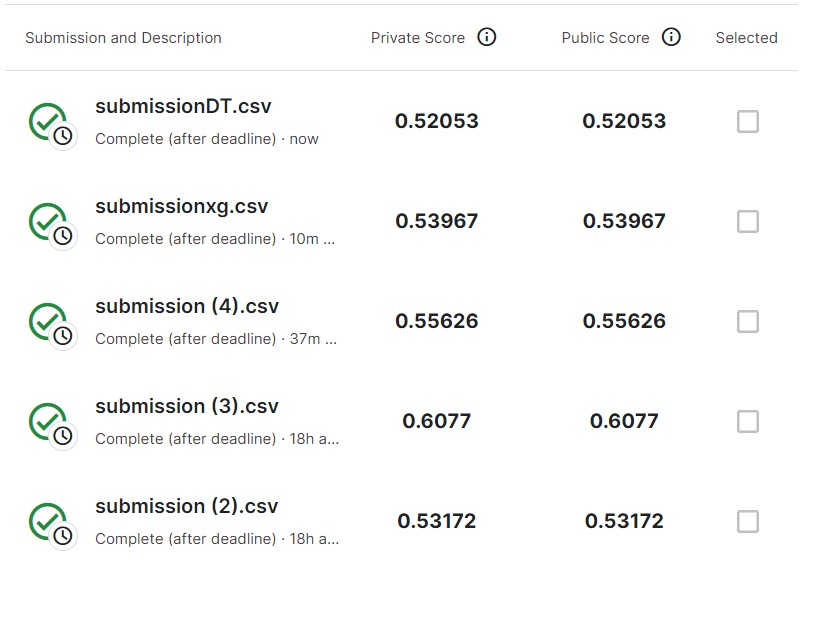

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
